<a href="https://colab.research.google.com/github/Saifullah785/python-data-science-handbook-notes/blob/main/02_06_Boolean_Arrays_and_Masks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparisons, Masks, and Boolean Logic**


---

This section of your notebook introduces how to perform comparisons on NumPy arrays, use the results of these comparisons to create "masks," and apply Boolean logic to manipulate these masks and select specific data.

# **Example: Counting Rainy Days**


---

This is a practical example demonstrating how to use NumPy to analyze a dataset.

**Load Data:**

It loads weather data for Seattle using vega_datasets.

**Extract Rainfall:**

It extracts the precipitation data for the year 2015 and stores it as a NumPy array called rainfall_mm.

**Visualize Data:**

It uses matplotlib to create a histogram of the rainfall data, allowing you to see the distribution of rainfall amounts

In [88]:
# importing necessary libraries
import numpy as np

from vega_datasets import data

# Use DataFrame operations to extract ranifall as a Numpy array
# Load the seattle weather dataset and extract precipitation for 2015 as a NumPy array

rainfall_mm = np.array(data.seattle_weather().set_index("date")['precipitation']['2015'])

# Print the length of the rainfall data
len(rainfall_mm)


365

In [126]:
# Set the backend for matplotlib to display plots inline

% natplotlib inline
import matplotlib.pyplot as plt

# Apply a seaborn style for better plot aesthetics

plt.style.use('seaborn-whitegrid')


UsageError: Line magic function `%` not found.


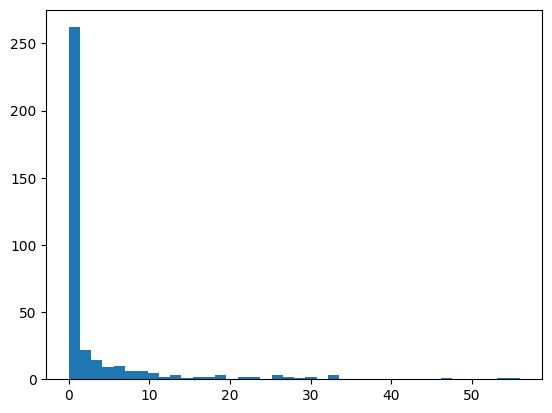

In [125]:
# Create a histogram of the rainfall data with 40 bins

plt.hist(rainfall_mm, 40);

# **Comparison Operators as Ufuncs**


---

This part explains how standard comparison operators (<, >, <=, >=, !=, ==) work with NumPy arrays.

Element-wise Comparison: When you use a comparison operator with a NumPy array, it performs the comparison element by element.

**Boolean Array Result:**

The result of such a comparison is a new NumPy array of the same shape as the original, but filled with True or False values based on whether the comparison was true for each element

In [90]:
# Create a NumPy array

x = np.array([1, 2, 3, 4, 5])
x

array([1, 2, 3, 4, 5])

In [91]:
# Perform element-wise comparison: less than 3

x < 3 # less than

array([ True,  True, False, False, False])

In [92]:
# Perform element-wise comparison: greater than 3

x > 3 # greater than

array([False, False, False,  True,  True])

In [93]:
# Perform element-wise comparison: less than or equal to

x <= 3  # less than or equal

array([ True,  True,  True, False, False])

In [94]:
# Perform element-wise comparison: greater than or equal to 3

x >= 3  # greater than or equal

array([False, False,  True,  True,  True])

In [95]:
# Perform element-wise comparison: not equal to 3

x != 3  # not equal

array([ True,  True, False,  True,  True])

In [96]:
# Perform element-wise comparison: equal to 3

x == 3  # equal

array([False, False,  True, False, False])

In [97]:
# Perform element-wise comparison: (2 * x) equals (x squared)

(2 * x) == (x ** 2)

array([False,  True, False, False, False])

In [98]:
# Create a random number generator with a seed

rng = np.random.default_rng(seed=1701)

# Generate a 3x4 array of random integers between 0 and 9

x = rng.integers(10, size=(3, 4))
x

array([[9, 4, 0, 3],
       [8, 6, 3, 1],
       [3, 7, 4, 0]])

In [99]:
# Perform element-wise comparison: less than 6

x < 6

array([[False,  True,  True,  True],
       [False, False,  True,  True],
       [ True, False,  True,  True]])

# **Working with Boolean Arrays**


---

This section focuses on what you can do with the Boolean arrays created by comparisons.

**Displaying Boolean Arrays:**

You can print the Boolean array to see the results of the element-wise comparisons.

In [100]:
# Print the array x

print(x)

[[9 4 0 3]
 [8 6 3 1]
 [3 7 4 0]]


# **Counting Entries**


---
This demonstrates how to count the number of True values in a Boolean array, which corresponds to the number of elements that satisfy the comparison condition.

**np.count_nonzero():**

This function counts the number of non-zero elements in an array.

Since True is treated as 1 and False as 0 in a numerical context, np.count_nonzero() on a Boolean array effectively counts the True values.

**np.sum():**

Similarly, np.sum() on a Boolean array sums the True values (treated as 1s).

**Counting Along Axes:**

You can use the axis argument with np.sum() to count True values along a specific dimension (e.g., counting how many values in each row meet the condition).

**np.any():**

This function checks if any element in a Boolean array is True.

**np.all():**

This function checks if all elements in a Boolean array are True.

You can also use the axis argument here to check if all values along a specific dimension are True.


In [101]:
# This demonstrates how to count the number of True values in a Boolean array, which corresponds to the number of elements that satisfy the comparison condition.

# This function counts the number of non-zero elements in an array.
#
# Since True is treated as 1 and False as 0 in a numerical context, np.count_nonzero() on a Boolean array effectively counts the True values.

np.count_nonzero(x < 6)

8

In [102]:
# Similarly, np.sum() on a Boolean array sums the True values (treated as 1s).

np.sum(x < 6)

np.int64(8)

In [103]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([3, 2, 3])

In [104]:
# You can use the axis argument with np.sum() to count True values along a specific dimension
#  (e.g., counting how many values in each row meet the condition).
# are there any values greater than 8?

np.any(x > 8)

np.True_

In [105]:
# are there any values less than zero?

np.any(x < 0)

np.False_

In [106]:
# are all values less than 10?

np.all(x < 10)

np.True_

In [107]:
# are all values equal to 6?

np.all(x == 6)

np.False_

In [108]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([False, False,  True])

# **Boolean Operators**


---
This section introduces how to combine Boolean arrays using logical operators.

**Element-wise Logical Operations:**

NumPy provides element-wise logical operators:

& (and)

| (or)

^ (xor)

~ (not)

**Combining Conditions:**

These operators allow you to combine multiple comparison results to select elements that meet more complex criteria (e.g., days with rainfall between 10 mm and 20 mm).


In [109]:
# Count the number of days where rainfall is greater than 10 mm AND less than 20 mm

np.sum((rainfall_mm > 10) & (rainfall_mm < 20))

np.int64(16)

In [110]:
# Count the number of days where rainfall is NOT (less than or equal to 10 mm OR greater than or equal to 20 mm)

np.sum(~( (rainfall_mm <= 10) | (rainfall_mm >= 20) ))

np.int64(16)

In [111]:
# Count the number of days with no rain

print("Number days without rain:  ", np.sum(rainfall_mm == 0))

# Count the number of days with rain

print("Number days with rain:     ", np.sum(rainfall_mm != 0))

# Count the number of days with more than 10 mm of rain

print("Days with more than 10 mm: ", np.sum(rainfall_mm > 10))

# Count the number of rainy days with less than 5 mm of rain

print("Rainy days with < 5 mm:    ", np.sum((rainfall_mm > 0) &
                                            (rainfall_mm < 5)))

Number days without rain:   221
Number days with rain:      144
Days with more than 10 mm:  34
Rainy days with < 5 mm:     83


# **Boolean Arrays as Masks**

---

This is a powerful technique where a Boolean array is used to select elements from another array.

**Indexing with a Boolean Array:**

When you use a Boolean array to index another NumPy array of the same shape, it returns a new array containing only the elements from the original array where the corresponding value in the Boolean array is True.

**Selecting Data:**

This "masking" allows you to easily select subsets of your data based on conditions.

**Analyzing Subsets:**

You can then perform operations (like calculating the median or maximum) on these selected subsets of data.

The example shows calculating statistics for rainy days, summer days, and non-summer rainy days


In [112]:
# Print the array x
x

array([[9, 4, 0, 3],
       [8, 6, 3, 1],
       [3, 7, 4, 0]])

In [113]:
# Create a boolean mask for elements in x less than 5

x < 5

array([[False,  True,  True,  True],
       [False, False,  True,  True],
       [ True, False,  True,  True]])

In [114]:
# Use the boolean mask to select elements from x that are less than 5

x[x < 5]

array([4, 0, 3, 3, 1, 3, 4, 0])

In [115]:
# construct a mask of all rainy days
rainy = (rainfall_mm > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2015 (mm):   ",
      np.median(rainfall_mm[rainy]))
print("Median precip on summer days in 2015 (mm):  ",
      np.median(rainfall_mm[summer]))
print("Maximum precip on summer days in 2015 (mm): ",
      np.max(rainfall_mm[summer]))
print("Median precip on non-summer rainy days (mm):",
      np.median(rainfall_mm[rainy & ~summer]))

Median precip on rainy days in 2015 (mm):    3.8
Median precip on summer days in 2015 (mm):   0.0
Maximum precip on summer days in 2015 (mm):  32.5
Median precip on non-summer rainy days (mm): 4.1


# **Using the Keywords and/or Versus the Operators &/|**



---

This section highlights an important distinction between Python's built-in and/or keywords and NumPy's element-wise &/| operators.

**Python Keywords (and, or):**

These operate on the truthiness of entire objects. They are used for short-circuit evaluation and return one of the operands. They are not designed for element-wise operations on arrays.

**NumPy Operators (&, |, ^, ~):**

These perform element-wise logical operations on NumPy arrays, returning a new Boolean array.

**Error with Keywords:**

Using and or or with NumPy arrays (especially for element-wise logic) will often result in an error because these operators don't work element by element.

**Use Correct Operators:**

Always use &, |, ^, and ~ when you want to perform element-wise Boolean logic on NumPy arrays.

In summary, these topics demonstrate how NumPy's powerful indexing and Boolean operations allow you to efficiently select, count, and analyze data based on various conditions, which is fundamental for data manipulation and analysis in Python.

In [116]:
# Check the boolean value of 42 and 0

bool(42), bool(0)

(True, False)

In [117]:
# Perform a boolean 'and' operation between the boolean values of 42 and 0

bool(42 and 0)

False

In [118]:
# Perform a boolean 'or' operation between the boolean values of 42 and 0

bool(42 or 0)

True

In [119]:
# Get the binary representation of 42

bin(42)

'0b101010'

In [120]:
# Get the binary representation of 59

bin(59)

'0b111011'

In [121]:
# Perform a bitwise 'and' operation between 42 and 59 and get the binary result

bin(42 & 59)

'0b101010'

In [122]:
# Perform a bitwise 'or' operation between 42 and 59 and get the binary result

bin(42 | 59)

'0b111011'

In [123]:
# Create two boolean NumPy arrays

A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [124]:
# Attempt to perform a boolean 'or' operation on the entire arrays (will result in error)

A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
# Create a NumPy array of numbers from 0 to 9

x = np.arange(10)

# Perform element-wise boolean 'and' on two comparison results

(x > 4) & (x < 8)

In [ ]:
# Attempt to perform a boolean 'and' operation on the entire comparison results (will result in error)

(x > 4) and (x < 8)